## LAB 6: Pattern Recognition with Neural Networks
`Sabin Dahal (022bscit035)`

Pattern recognition is teaching a computer to spot patterns or similarities in data, like recognizing a face or reading a handwritten digit.Multilayer perceptrons (MLPs), are really good at this. They’re modeled after the human brain and made up of layers of nodes (neurons) that pass signals forward. When we train a neural network, we give it input data and the correct output, and it learns by adjusting weights using methods like backpropagation and gradient descent. Over time, it gets better at matching inputs to the right outputs even for data it hasn’t seen before. Activation functions like tanh or sigmoid help the network handle complex patterns by adding non-linearity. Overall, neural networks are powerful tools in pattern recognition and are used in all kinds of areas like image recognition, speech processing, and more.

In [2]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


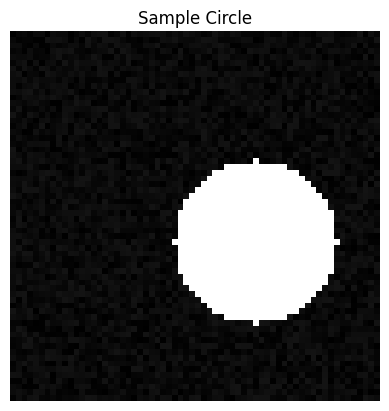

In [4]:
shapes = ['circle', 'square', 'triangle']
data = []   # Will store the pixel data of each image
labels = [] # Will store the label (0, 1, or 2) for each shape

# Function to create an image with a single shape
def draw_shape(shape_name):
    # Start with a black 64x64 image
    img = np.zeros((64, 64), dtype=np.uint8)

    # Choose random center and size for the shape
    x = random.randint(20, 44)
    y = random.randint(20, 44)
    size = random.randint(10, 20)

    # Draw the chosen shape
    if shape_name == 'circle':
        cv2.circle(img, (x, y), size, 255, -1)  # White filled circle
    elif shape_name == 'square':
        top_left = (x - size, y - size)
        bottom_right = (x + size, y + size)
        cv2.rectangle(img, top_left, bottom_right, 255, -1)  # White filled square
    elif shape_name == 'triangle':
        # Generate 3 random points for the triangle
        points = np.array([[random.randint(10, 54), random.randint(10, 54)] for _ in range(3)], np.int32)
        points = points.reshape((-1, 1, 2))
        cv2.fillPoly(img, [points], 255)  # White filled triangle

    # Add some random noise to the image to make it realistic
    noise = np.random.randint(0, 20, (64, 64), dtype=np.uint8)
    img = cv2.add(img, noise)

    return img

# Show one sample shape (optional preview)
sample = draw_shape('circle')
plt.imshow(sample, cmap='gray')  # Display the image in grayscale
plt.title("Sample Circle")
plt.axis('off')
plt.show()

# Generate 100,000 images and labels
for _ in range(100000):
    shape = random.choice(shapes)        # Pick a random shape
    image = draw_shape(shape)            # Create the image
    data.append(image.flatten() / 255.0) # Flatten and normalize pixel values
    labels.append(shapes.index(shape))   # Label: 0 for circle, 1 for square, 2 for triangle

In [5]:
X = np.array(data)
y = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Dense(128, activation='relu', input_shape=(64*64,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

d:\csit sabin\sabin dahal lab 035\imageprocessing\tf-env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8711 - loss: 0.3026 - val_accuracy: 0.9895 - val_loss: 0.0294
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9972 - val_loss: 0.0100
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9971 - loss: 0.0097 - val_accuracy: 0.9937 - val_loss: 0.0207
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9947 - loss: 0.0205 - val_accuracy: 0.9946 - val_loss: 0.0188
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.9977 - val_loss: 0.0076
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9998 - val_loss: 6.1762e-04
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9987 - loss: 

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9996 - loss: 0.0028
Test Accuracy: 99.94%


In [7]:
def test(img):
    # Predict class using the trained model
    img_flat = img.flatten().reshape(1, -1)  # Shape: (1, 4096)
    prediction = model.predict(img_flat)
    predicted_label = np.argmax(prediction)

    # Label mapping
    shapes = ['circle', 'square', 'triangle']
    print("Predicted Shape:", shapes[predicted_label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Shape: triangle


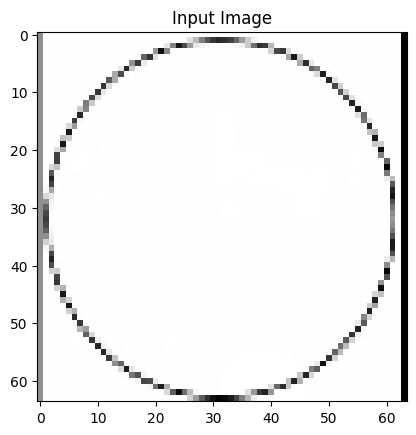

In [8]:
circle = cv2.imread('circle.png', cv2.IMREAD_GRAYSCALE)
if circle is None:
    print("Error: Image not loaded. Check the file path.")
else:
    circle = cv2.resize(circle, (64, 64))
    circle = circle / 255.0  # float division to keep values 0.0-1.0

    test(circle)

    plt.imshow(circle, cmap='gray')
    plt.title("Input Image")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Shape: triangle


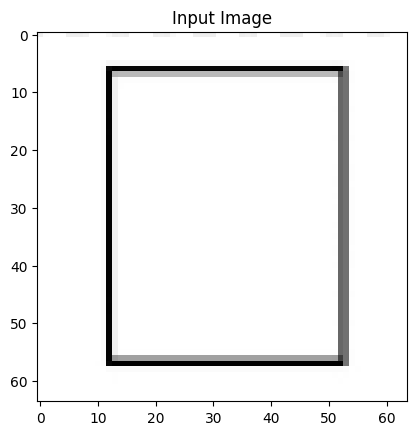

In [9]:
square = cv2.imread('square.png', cv2.IMREAD_GRAYSCALE)
if square is None:
    print("Error: Image not loaded. Check the file path.")
else:
    square = cv2.resize(square, (64, 64))
    square = square / 255.0  # use float division to normalize pixel values to [0,1]

    test(square)

    plt.imshow(square, cmap='gray')
    plt.title("Input Image")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Shape: triangle


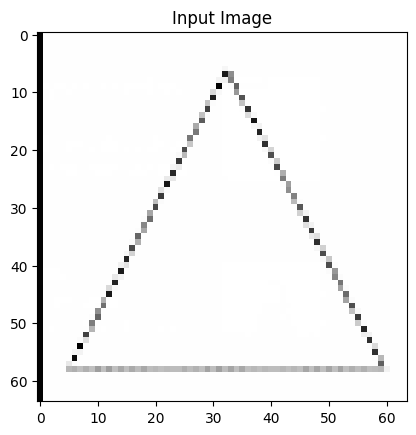

In [10]:
triangle = cv2.imread('triangle.png', cv2.IMREAD_GRAYSCALE)
if triangle is None:
    print("Error: Image not loaded. Check the file path.")
else:
    triangle = cv2.resize(triangle, (64, 64))
    triangle = triangle / 255.0  # float division for normalization
    test(triangle)
    plt.imshow(triangle, cmap='gray')
    plt.title("Input Image")
    plt.show()
